In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
data.isnull().sum()


Age                         0
Matches Played              0
Starts                      0
Minutes                     0
90s Played                  0
Assists                     0
Goals Per 90                0
Assists Per 90              0
Non-Penalty Goals Per 90    0
xG Per 90                   0
xAG Per 90                  0
npxG Per 90                 0
dtype: int64

In [13]:
import pandas as pd

# Load your data
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# 1. Check how many duplicate rows exist
data.duplicated().sum()

# 2. Display the duplicate rows (if you want to see them)
data[data.duplicated()]

# 3. Remove duplicates (if needed)
data_clean = data.drop_duplicates()

# 4. Check again to confirm duplicates removed
data_clean.duplicated().sum()


0

In [14]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate Z-scores
z_scores = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

# Outliers where |z| > 3
outliers_z = numeric_cols[(np.abs(z_scores) > 3).any(axis=1)]

outliers_z


,Age,Matches Played,Starts,Minutes,90s Played,Goals,Assists,Goals Per 90,Assists Per 90,Non-Penalty Goals Per 90,xG Per 90,xAG Per 90,npxG Per 90
0,32,38,38,3371,37.5,29,18,0.77,0.48,0.53,0.67,0.38,0.49
8,27,36,28,2399,26.7,13,5,0.49,0.19,0.49,0.45,0.19,0.45
19,21,18,2,371,4.1,1,2,0.24,0.49,0.24,0.43,0.26,0.43
24,32,38,38,3371,37.5,29,18,0.77,0.48,0.53,0.67,0.38,0.49
32,27,36,28,2399,26.7,13,5,0.49,0.19,0.49,0.45,0.19,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,26,35,20,1677,18.6,2,7,0.11,0.38,0.11,0.08,0.20,0.08
2246,24,1,0,7,0.1,0,0,0.00,0.00,0.00,0.00,0.42,0.00
2250,32,38,38,3371,37.5,29,18,0.77,0.48,0.53,0.67,0.38,0.49
2258,27,36,28,2399,26.7,13,5,0.49,0.19,0.49,0.45,0.19,0.45


In [15]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with ANY outlier in numeric columns
data_no_outliers = data[~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]

data_no_outliers.shape


(1643, 14)

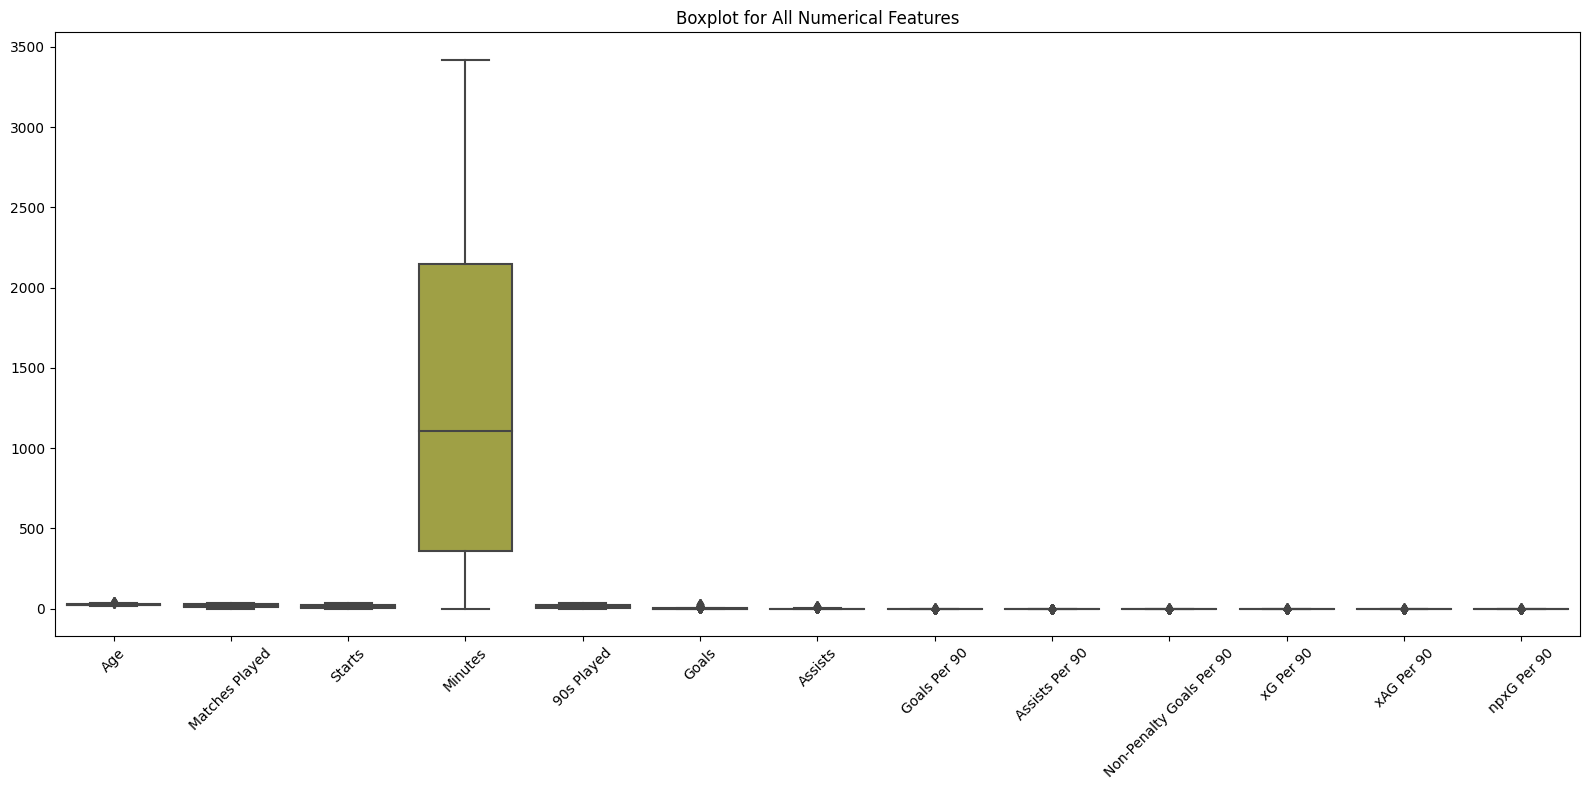

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# Select only numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Set figure size
plt.figure(figsize=(16, 8))

# Create boxplots
sns.boxplot(data=numeric_cols)

plt.xticks(rotation=45)
plt.title("Boxplot for All Numerical Features")
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Load data
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# Create bins for Goals
data["Goals_Category"] = pd.cut(
    data["Goals"],
    bins=[-1, 5, 15, 50],   # adjust if needed
    labels=["Low", "Medium", "High"]
)

# Create bins for Assists
data["Assists_Category"] = pd.cut(
    data["Assists"],
    bins=[-1, 5, 15, 50],
    labels=["Low", "Medium", "High"]
)

data[["Goals", "Goals_Category", "Assists", "Assists_Category"]].head()


,Goals,Goals_Category,Assists,Assists_Category
0,29,High,18,High
1,3,Low,1,Low
2,0,Low,4,Low
3,5,Low,5,Low
4,1,Low,2,Low


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()


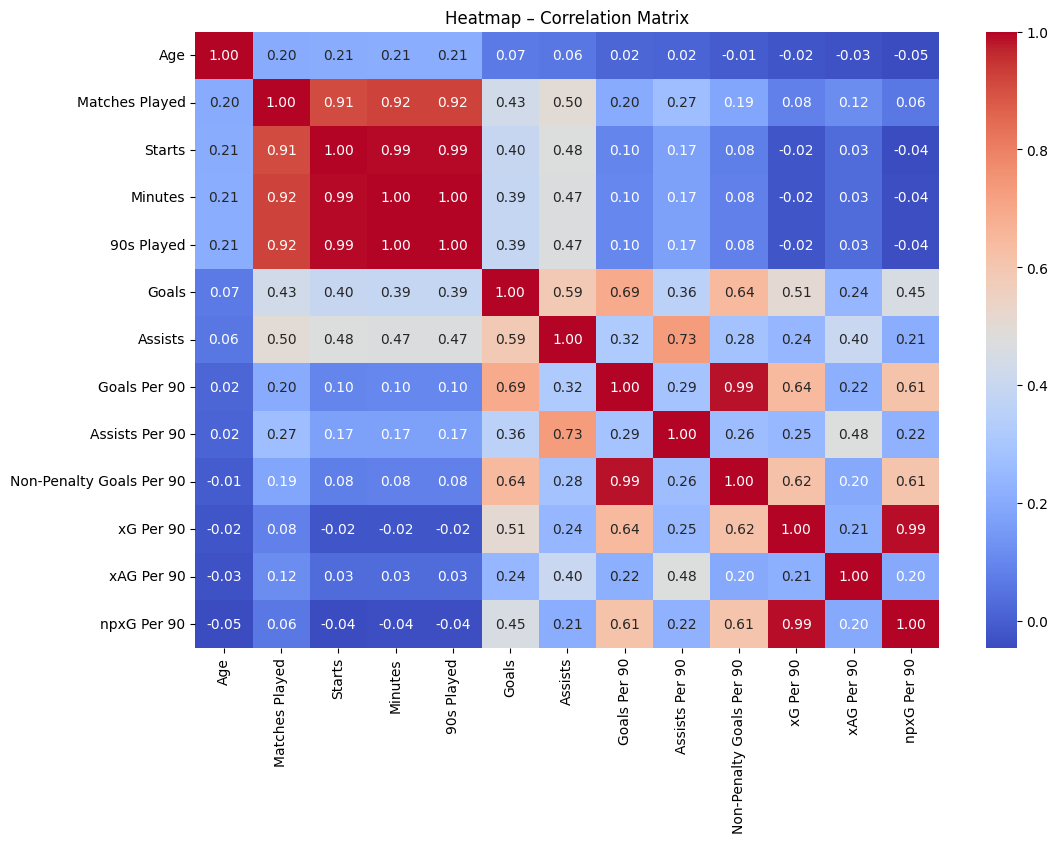

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap – Correlation Matrix")
plt.show()


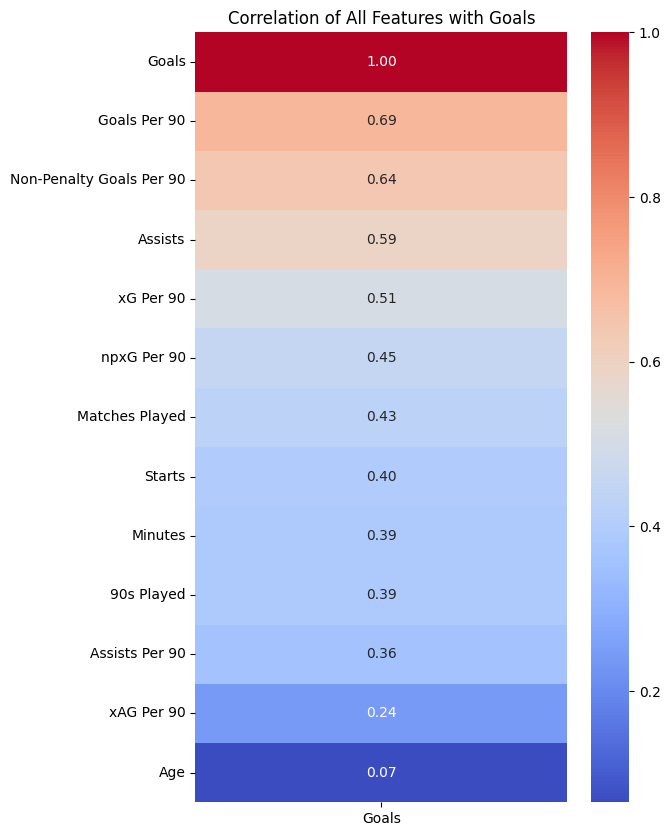

In [20]:
plt.figure(figsize=(6,10))

sns.heatmap(
    corr_matrix[["Goals"]].sort_values(by="Goals", ascending=False),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation of All Features with Goals")
plt.show()


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()


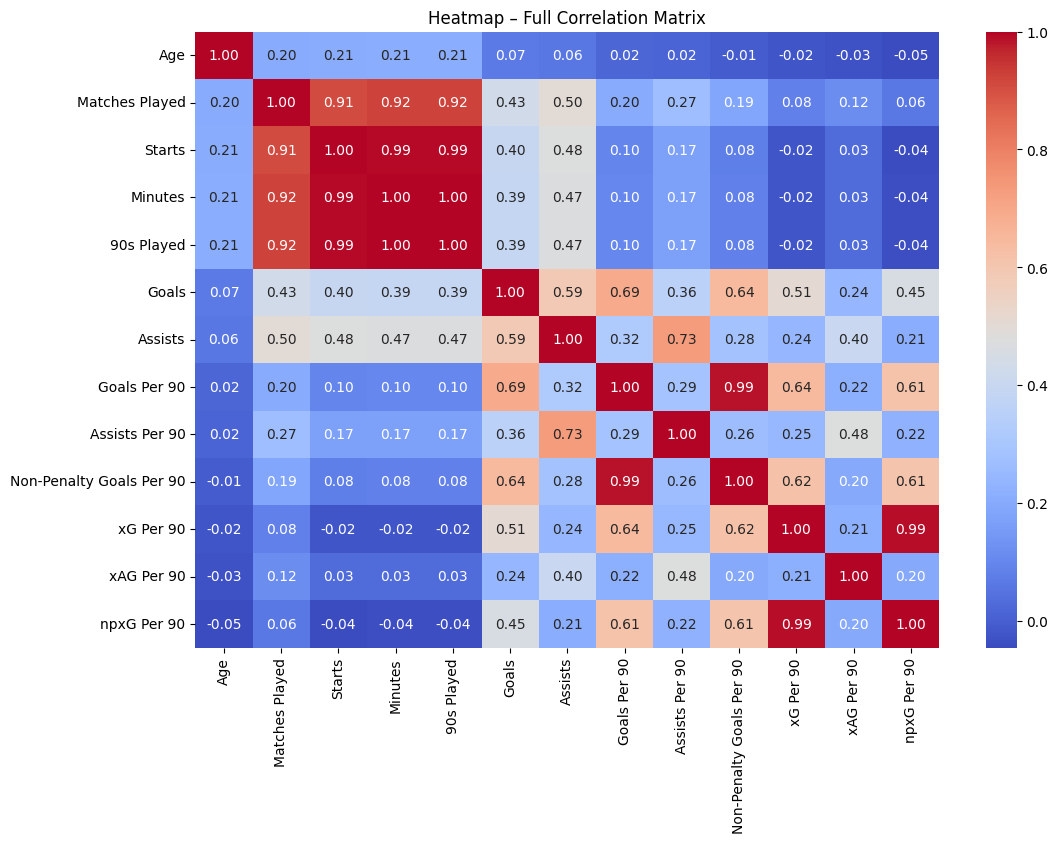

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap – Full Correlation Matrix")
plt.show()


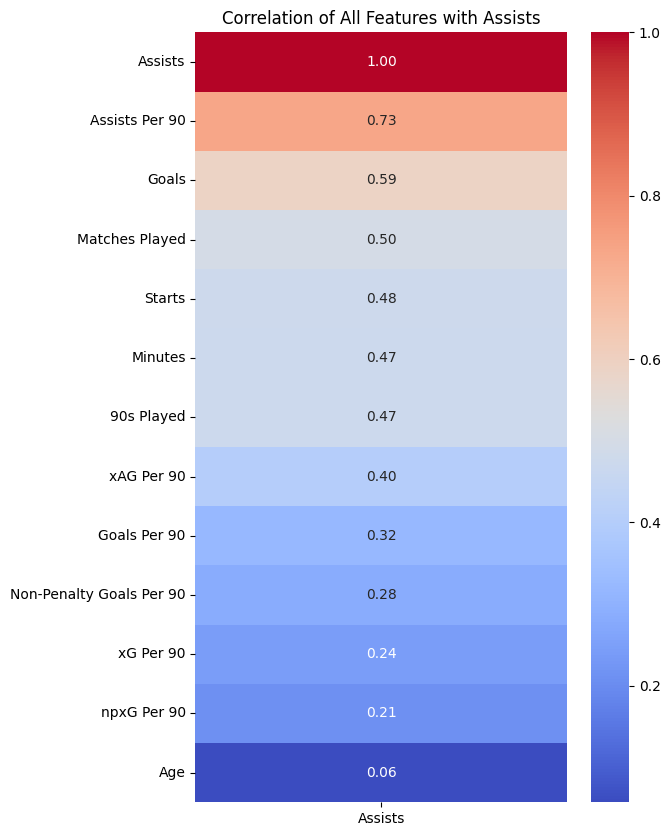

In [23]:
plt.figure(figsize=(6,10))

sns.heatmap(
    corr_matrix[["Assists"]].sort_values(by="Assists", ascending=False),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation of All Features with Assists")
plt.show()


In [4]:
# ---------------------------------------
# 1. Import Libraries
# ---------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# ---------------------------------------
# 2. Load Your Excel File
# ---------------------------------------
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# ---------------------------------------
# 3. Drop unwanted columns
# ---------------------------------------
data = data.drop(columns=["Assists"], errors="ignore")           # drop assists
data = data.drop(columns=["Unnamed: 0"], errors="ignore")        # drop index column if exists

# ---------------------------------------
# 4. Separate features (X) and target (y)
# ---------------------------------------
X = data.drop(columns=["Goals"])     # features
y = data["Goals"]                    # target

# ---------------------------------------
# 5. Train–Test Split
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------
# 6. Initialize Models
# ---------------------------------------
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# ---------------------------------------
# 7. Train the Models
# ---------------------------------------
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# ---------------------------------------
# 8. Predict
# ---------------------------------------
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)
pred_xgb = model_xgb.predict(X_test)

# ---------------------------------------
# 9. Evaluation Function
# ---------------------------------------
def evaluate(y_test, pred):
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    return mae, rmse, r2

# ---------------------------------------
# 10. Evaluate All Models
# ---------------------------------------
lr_eval = evaluate(y_test, pred_lr)
rf_eval = evaluate(y_test, pred_rf)
xgb_eval = evaluate(y_test, pred_xgb)

# ---------------------------------------
# 11. Print Results
# ---------------------------------------
print("\n📌 Linear Regression Results:")
print("MAE :", lr_eval[0])
print("RMSE:", lr_eval[1])
print("R²  :", lr_eval[2])

print("\n📌 Random Forest Results:")
print("MAE :", rf_eval[0])
print("RMSE:", rf_eval[1])
print("R²  :", rf_eval[2])

print("\n📌 XGBoost Results:")
print("MAE :", xgb_eval[0])
print("RMSE:", xgb_eval[1])
print("R²  :", xgb_eval[2])



📌 Linear Regression Results:
MAE : 1.0998743299175489
RMSE: 2.265545349180054
R²  : 0.4004949441137925

📌 Random Forest Results:
MAE : 0.07496703296703297
RMSE: 0.31898706439720603
R²  : 0.9881151563141765

📌 XGBoost Results:
MAE : 0.08392713684558088
RMSE: 0.3097984570887825
R²  : 0.9887899943535294


In [12]:
# ---------------------------------------
# 1. Import Libraries
# ---------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# ---------------------------------------
# 2. Load Data
# ---------------------------------------
data = pd.read_excel("/kaggle/input/project/Goals  Assist_selected (1).xlsx")

# ---------------------------------------
# 3. Drop unwanted columns
# ---------------------------------------
data = data.drop(columns=["Goals"], errors="ignore")       # drop Goals
data = data.drop(columns=["Unnamed: 0"], errors="ignore")  # drop index if exists

# ---------------------------------------
# 4. Define X (features) and y (target)
# ---------------------------------------
y = data["Assists"]                     # target = Assists
X = data.drop(columns=["Assists"])      # features

# ---------------------------------------
# 5. Train–Test Split
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------
# 6. Build Models
# ---------------------------------------
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# ---------------------------------------
# 7. Train Models
# ---------------------------------------
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# ---------------------------------------
# 8. Predictions
# ---------------------------------------
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)
pred_xgb = model_xgb.predict(X_test)

# ---------------------------------------
# 9. Evaluation Function
# ---------------------------------------
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# ---------------------------------------
# 10. Model Evaluation
# ---------------------------------------
lr_eval = evaluate(y_test, pred_lr)
rf_eval = evaluate(y_test, pred_rf)
xgb_eval = evaluate(y_test, pred_xgb)

# ---------------------------------------
# 11. Print Results
# ---------------------------------------
print("\n📌 Linear Regression Results:")
print("MAE :", lr_eval[0])
print("RMSE:", lr_eval[1])
print("R²  :", lr_eval[2])

print("\n📌 Random Forest Results:")
print("MAE :", rf_eval[0])
print("RMSE:", rf_eval[1])
print("R²  :", rf_eval[2])

print("\n📌 XGBoost Results:")
print("MAE :", xgb_eval[0])
print("RMSE:", xgb_eval[1])
print("R²  :", xgb_eval[2])



📌 Linear Regression Results:
MAE : 0.6727323760786743
RMSE: 1.093511352097663
R²  : 0.6283625087066124

📌 Random Forest Results:
MAE : 0.0524175824175824
RMSE: 0.23853536609719087
R²  : 0.9823160823340079

📌 XGBoost Results:
MAE : 0.05718981274603196
RMSE: 0.248565310276679
R²  : 0.9807976684140063
